<h2  style="text-align: center"> ML - Conecta café </h2><br>
<div style="text-align: justify"> Modelo de <i> machine learning </i> criado para a plataforma <b> Conecta Café </b> com o objetivo de reunir compradores de cafés especiais com cafeicultores que possuam <i>fit</i>.</div>

<h3> Contexto </h3><br>
<div style="text-align: justify"> 
    Com o avanço da tecnologia, a conexão entre produtores e consumidores de produtos e serviços de qualquer natureza está se tornando cada vez maior, uma vez que ela permite expandir e democratizar o acesso a deles.
    <br>
    Pensando nisso, foi criado uma plataforma Web que tem como propósito de conectar facilmente cafeicultores e consumidores de cafés especiais. Nessa aplicação, o produtor pode cadastrar os dados do café produzido permitindo assim, que compradores possam realizar a pesquisa e encontrar o café de sua escolha.
</div>

<h3> Problemática </h3><br>
<div style="text-align: justify"> 
    Ao acessar o site o consumidor pode buscar pelo café inserindo alguns dados em um filtro. Porém, pense que o comprador não sabe o que procura, é apenas alguém que não possui conhecimento sobre cafés especiais, mas gostaria de experimentar algo novo. Não seria interessante a plataforma entender o comportamento desse cliente e realizar recomendações baseadas em alguns dados? </div>

<h3> Proposta </h3><br>
<div style="text-align: justify"> 
A proposta é aproximar compradores com cafeicultores que possuem características semelhantes. Como por exemplo, baseado na condição financeira, onde consumidores de grandes quantidades de café sejam agrupados com produtores que produzam o suficiente para atendê-los. Isso é pensado para reduzir o <i> overflow </i> de dados atual da plataforma e melhorar o sistema de busca da aplicação.</div>

---
<h2  style="text-align: center"> Projeto </h2>

<h3> Informações </h3>

Por ser uma plataforma ainda não colocada em produção, os dados ainda não foram coletados e por conta disso será criado um dataset que simula os dados reais.

Para simular os dados, algumas regras de negócios foram utilizadas para dar mais coerência para os dataset, são elas:
- Regras para o Produtor: 
    - Produtores que produzem café especial não podem ter nota abaixo de 80;
    - Pela dificuldade de produzir café especial normalmente produtores que produzem esse tipo de café, produzem em uma quantidade menor de quem não produz;
    - Avaliar o range da pontuação do café com base na região.

- Regras para o Consumidor:
    - Possivelmente quem tem interesse em café especial, está disposto a gastar mais.
    - O tipo de consumidor (pessoa física ou jurídica) interfere na quantidade preterida, pois uma pessoa jurídica normalmente é um estabelecimento, ou seja, busca uma maior quantidade de cafés para compra.

<h3> Repositórios </h3>

- **[🤖 API da plataforma](https://github.com/Brendhon/conecta-cafe-api)**
- **[📟 Aplicação Web](https://github.com/GabrielGSD/Conecta_Cafe_React)**
- **[🎰 Projeto ML](https://github.com/Brendhon/conecta-cafe-ml)**

<h3> Autores </h3><br>

<div style="display: flex;"> 

<a href="https://github.com/Brendhon" style="text-align: center">
    <img style="float:left; border-radius: 15px; display: inline; margin: 10px;" src="https://github.com/brendhon.png" width="120px;" alt="autor"/>
    <br><br><br><br><br><br>
    <strong > Brendhon Moreira </strong>
</a>
<br><br>
<a href="https://github.com/GabrielGSD" style="text-align: center">
    <img style="float:left; border-radius: 15px; display: inline;  margin: 10px;" src="https://github.com/GabrielGSD.png" width="120px;" alt="autor"/>
    <br><br><br><br><br><br>
    <strong > Gabriel Daniel </strong>
</a>
<br><br>
<a href="https://github.com/MoisesSDelmoro" style="text-align: center">
    <img style="float:left; border-radius: 15px; display: inline;  margin: 10px;" src="https://github.com/MoisesSDelmoro.png" width="120px;" alt="autor"/>
    <br><br><br><br><br><br>
    <strong >Moises Delmoro</strong>
</a></div>

---
<h2  style="text-align: center"> Desenvolvimento </h2><br>

In [1]:
# Instalando os pacotes necessários
import sys
!{sys.executable} -m pip install pandas 
!{sys.executable} -m pip install numpy 
!{sys.executable} -m pip install requests
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install scipy 
!{sys.executable} -m pip install seaborn

In [2]:
# Importar as biblotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Permitir que as funções do arquivo de funções auxiliares sejam utilizadas
%run auxiliary_functions.ipynb   

<h3> Declarando Variaveis </h3>

In [3]:
# Variaveis gerais
dataset_size = 1000
dataset_seed = 42

# Variaveis do consumidor
consumer_cols = "ifcccc"
consumer_col_names = ["id", "financial_condition", "residence", "search_special_coffee", 'desired_quantity', 'person_type']
consumer_intervals = [(1,100000000), (10.0,500.0), [1,2,3,4,5,6], [True, False], [0.5, 1, 60], [1,2]]

# Variaveis do produtor
producer_cols = "iccci"
producer_col_names = ["id", "quantity_produced", "residence", "produces_special_coffee", "coffee_score"]
producer_intervals = [(1,100000000), [0.5, 1, 60], [1,2,3,4,5,6], [True, False],  (0,100)]

---

<h3> Gerando tabelas auxiliares  </h3>
<br>
<i> Observação: Para poder utilizar os dados no modelo é necessário indexar certos atributos para que o modelo seja capaz de entender os dados, para isso foi feito a criação dessas tabelas </i><br>

In [4]:
# Tabela de residencias b
states = ["Bahia", "Minas Gerais", "Espírito Santo", "Rio de Janeiro", "São Paulo", "Paraná"]
states_id=[1,2,3,4,5,6]
residence_df = pd.DataFrame(data=np.array([states_id, states]), index=["residence_id", "residence_name"]).T
residence_df

# Durante algumas pesquisas foi encontrado os principais produtores de café no pais e com esses dados essa tabela foi criada
# Reference: https://www.mokaclube.com.br/blog/regioes-cafeeiras-do-brasil/

,residence_id,residence_name
0,1,Bahia
1,2,Minas Gerais
2,3,Espírito Santo
3,4,Rio de Janeiro
4,5,São Paulo
5,6,Paraná


In [5]:
# Tabela de Tipo de pessoa (Física ou Jurídica)
consumer_type = ["Pessoa Física", "Pessoa Jurídica"]
consumer_type_id = [1,2]
consumer_type_df = pd.DataFrame(data=np.array([consumer_type_id, consumer_type]), index=["consumer_type_id", "consumer_type"]).T
consumer_type_df

,consumer_type_id,consumer_type
0,1,Pessoa Física
1,2,Pessoa Jurídica


---

<h3> Gerando os dados do consumidor </h3>

Pensando na coluna de quantidade preterida foi levado em conta se o consumidor é uma pessoa jurídica ou física. Isso é importante, pois uma pessoa jurídica normalmente é um estabelecimento, ou seja, busca uma maior quantidade de cafés para compra.

In [6]:
columns = ["person_type", "desired_quantity"]
data = generate_person_type_and_desired_quantity(dataset_size)
desired_quantity_df = pd.DataFrame(data=data, columns = columns)
desired_quantity_df.head(10)

,person_type,desired_quantity
0,2,60.0
1,1,1.0
2,1,1.0
3,1,0.5
4,2,60.0
5,2,60.0
6,2,60.0
7,2,60.0
8,2,60.0
9,1,1.0


<br> Possivelmente quem tem interesse em café especial, está disposto a gastar mais

In [7]:
columns=["search_special_coffee", "financial_condition"]
data=generate_search_special_coffee_and_financial_condition(dataset_size)
quantity_financial_condition = pd.DataFrame(data=data, columns=columns)
quantity_financial_condition.head()

,search_special_coffee,financial_condition
0,False,96
1,True,334
2,False,115
3,False,129
4,True,247


<h3> Gerando os dados do produtor </h3>

Pontuação do café gerada com base na altitude e qualidade médias dos cafés nos estados pesquisados

In [8]:
columns=["residence_id", "coffee_score"]
data=generate_coffee_score_and_residences(dataset_size)
coffee_score_df = pd.DataFrame(data=data, columns=columns)
coffee_score_df.head()

,residence_id,coffee_score
0,3,64
1,5,71
2,5,77
3,6,82
4,6,68


<br>Pela dificuldade de produzir café especial normalmente produtores que produzem esse tipo de café, produzem em uma quantidade menor de quem não produz.


In [9]:
columns=["produces_special_coffee", "quantity_produced"]
data=generate_produces_special_coffee_and_quantity_produced(dataset_size)
quantity_produced_df = pd.DataFrame(data=data, columns=columns)
quantity_produced_df.head()

,produces_special_coffee,quantity_produced
0,True,962
1,True,744
2,True,913
3,False,1023
4,True,868


---

<h3> Gerando os dataframes </h3>

In [8]:
# Dataframe do consumidor
consumer_df = generate_fake_dataframe(
  size = dataset_size, 
  cols = consumer_cols, 
  col_names = consumer_col_names,
  intervals = consumer_intervals,
  seed=dataset_seed)

In [10]:
# Dataframe do produtor
producer_df = generate_fake_dataframe(
  size = dataset_size, 
  cols = producer_cols, 
  col_names = producer_col_names,
  intervals = producer_intervals,
  seed=dataset_seed)

Obs: Os dados gerados pela função 'generate_fake_dataframe' não utiliza as regras de negócio definidas, portanto alguns de seus dados serão substituídos

#### Alterando as colunas geradas randomicamente pelas geradas utilizando as regras de negócio

In [11]:
# Alterando os dados do produtor
producer_df['residence'] = coffee_score_df['residence_id']
producer_df['coffee_score'] = coffee_score_df['coffee_score']

producer_df['produces_special_coffee'] = quantity_produced_df['produces_special_coffee']
producer_df['quantity_produced'] = quantity_produced_df['quantity_produced']

In [9]:
# Alterando os dados do consumidor
consumer_df['person_type'] = desired_quantity_df['person_type']
consumer_df['desired_quantity'] = desired_quantity_df['desired_quantity']

consumer_df['search_special_coffee'] = quantity_financial_condition['search_special_coffee']
consumer_df['financial_condition'] = quantity_financial_condition['financial_condition']


<br>
Baseado na regra de que produtores de café especial não podem ter nota abaixo de 80, os valores fora desse padrão serão removidos

In [12]:
# Removendo os produtores gerados que produzem café especial com nota abaixo de 80
producer_df = producer_df.drop(producer_df[(producer_df['produces_special_coffee'] == True) 
                                           & (producer_df['coffee_score']  < 80)].index)

#### Mostrando dataframes criados

In [13]:
# Mostrando uma amostra dos dados do produtor
producer_df.head(10)

,id,quantity_produced,residence,produces_special_coffee,coffee_score
3,43887844,1023,6,False,82
5,85859792,1040,2,False,76
6,8594564,631,6,False,72
8,20146954,546,6,False,78
9,9417735,788,2,False,88
10,52647898,1232,2,False,79
14,71747727,624,2,True,81
20,50035192,975,2,True,81
21,37079803,348,2,True,83
22,18254964,1315,2,False,84


In [10]:
# Mostrando uma amostra dos dados do consumidor
consumer_df.head(10)

,id,financial_condition,residence,search_special_coffee,desired_quantity,person_type
0,8925096,96,3,False,60.0,2
1,77395605,334,2,True,1.0,1
2,65457152,115,3,False,1.0,1
3,43887844,129,4,False,0.5,1
4,43301524,247,1,True,60.0,2
5,85859792,351,5,True,60.0,2
6,8594564,143,2,False,60.0,2
7,69736803,321,6,True,60.0,2
8,20146954,331,5,True,60.0,2
9,9417735,119,2,False,1.0,1


<br>

---
<h3> Modelagem do Consumidor </h3>

#### Normalizando os dados
Uma boa prática é normalizar os dados para que o processo de modelagem seja mais preciso

In [13]:
# Declarando scaler para normalizar dataframes
scaler = StandardScaler()

# Removendo coluna ID pois ela não é importante para o processo
aux_df = consumer_df
aux_df.drop(columns=['id'])

# Normalizando o dataframes
normalized_consumer_df = scaler.fit_transform(aux_df)

#### Implementando PCA
Pela quantidade de variaveis ser alta o PCA será implementado para melhor visualizar os dados

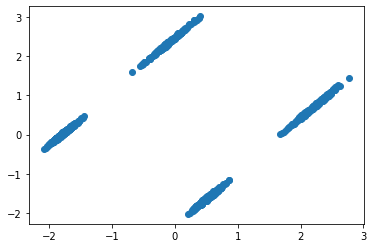

In [14]:
# Declarando PCA com 2 dimenções
pca = PCA(n_components=2)

# Pegando os dados após o fit_transform do PCA
pca_consumer_df = pca.fit_transform(normalized_consumer_df)

# Visualizando dados ajustados do consumidor
plt.scatter(pca_consumer_df[:, 0], pca_consumer_df[:, 1])
plt.show()

#### Implementando o método do cotovelo para visualizar o melhor valor de K
Vamos agora implementar o “método do cotovelo” para determinar o número de clusters. Isso pode ser feito usando WCSS (soma dos quadrados das distâncias dos pontos de dados)

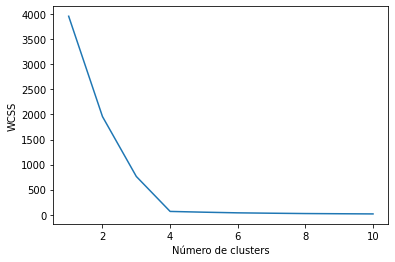

In [15]:
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters = i, init = "k-means++")
    model.fit(pca_consumer_df)
    wcss.append(model.inertia_)
plt.plot(range(1,11), wcss)
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

Como podemos observar o cotovelo se encontra no 4, ou seja, será usado 4 clusters para o consumidor 

In [16]:
k = 4

#### Alimentando modelo

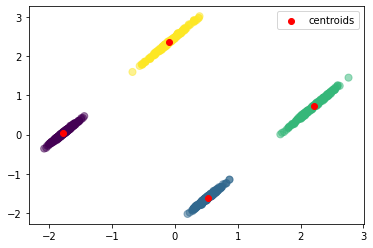

In [17]:
# Declarando modelo com 3 clusters
model = KMeans(n_clusters = k, init = "k-means++")

# Ajustando modelo com base nos dados fornecidos pelo PCA
model_v1 = model.fit(pca_consumer_df)

# Pegando centroids
centers = model_v1.cluster_centers_

# Visualizando dados modelados e agrupados
plt.scatter(pca_consumer_df[:, 0], pca_consumer_df[:, 1], c= model_v1.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], marker="o", color='r', label='centroids')
plt.legend(scatterpoints=1)
plt.show()

#### Pegando o resultado da modelagem

In [18]:
# Realizando o predict para encontrar os labels
labels = model_v1.predict(pca_consumer_df)

# Criando nova coluna com os Labels
consumer_df['labels'] = labels

# Visualizando dataframe com nova coluna
consumer_df.head(10)

,id,financial_condition,residence,search_special_coffee,desired_quantity,person_type,labels
0,8925096,96,3,False,60.0,2,0
1,77395605,334,2,True,1.0,1,2
2,65457152,115,3,False,1.0,1,1
3,43887844,129,4,False,0.5,1,1
4,43301524,247,1,True,60.0,2,3
5,85859792,351,5,True,60.0,2,3
6,8594564,143,2,False,60.0,2,0
7,69736803,321,6,True,60.0,2,3
8,20146954,331,5,True,60.0,2,3
9,9417735,119,2,False,1.0,1,1


#### Simulando novos produtores e classificando-os utilizando o modelo atual

In [20]:
# Pegando alguns dados da tabela para simular novos produtores
new_consumer_df = consumer_df.iloc[10:15, :].drop(columns=['id', 'labels'])

# Normalizando
new_consumer_df_norm = scaler.fit_transform(new_consumer_df)

# PCA
new_consumer_df_pca_norm = pca.fit_transform(new_consumer_df_norm)

# Predict dos novos produtores
label_predict = model_v1.predict(new_consumer_df_pca_norm)

# Adicionando resultados em uma nova coluna
new_consumer_df['labels'] = label_predict

# Mostrando os resultados
new_consumer_df

,financial_condition,residence,search_special_coffee,desired_quantity,person_type,labels
10,116,4,False,0.5,1,0
11,324,1,True,60.0,2,2
12,100,1,False,60.0,2,3
13,139,6,False,1.0,1,0
14,298,5,True,60.0,2,1


Podemos observar que para realizar o predict de um novo dado uma serie de tratativas são feitas para que esses dados sejam entendíveis pelo modelo.

Com isso em mente, e possuindo agora as variáveis de saída (coluna labels) vamos utilizar um classificador supervisionado para realizar a classificação de novos dados.

#### Treinando o classificador

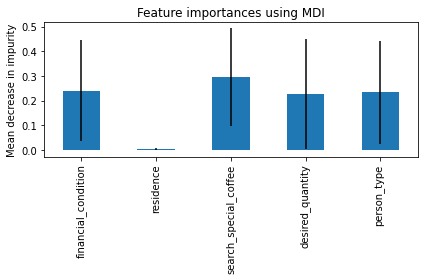

In [25]:
# Separando dados para teste e para o predict
X_train, X_test, y_train, y_test = train_test_split(consumer_df.drop(columns=['labels', 'id']), consumer_df['labels'], random_state=42, test_size=0.3)


# Declarando o ramdom forest
forest = RandomForestClassifier(random_state=0)

# Trainando o modelo
forest.fit(X_train, y_train)

# Pegando as feature importantes
importances = forest.feature_importances_

# Criando um serie par visualizar melhor as features importantes
forest_importances = pd.Series(importances, index=X_train.columns)

# Pegando o desvio padrão
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

# Visualizando as variavies mais importantes para o classificador
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Verificamos que a residência não possui importância nenhuma para o classificador

#### Avaliando o novo classificador

In [24]:
from sklearn.metrics import accuracy_score

new_consumer_df = consumer_df.iloc[10:20, :]

y_true = new_consumer_df['labels']
x_real = new_consumer_df.drop(columns=['labels', 'id'])

y_pred = forest.predict(x_real)

# Avaliando o classificador
accuracy_score(y_true, y_pred)

1.0

Resultado: Podemos observar que o classificador por possuir um score geral perfeito para o projeto atual. Com isso, vamos utilizar o classificador supervisionado para realizar as novas classificações

### Análise exploratória
Para isso, será utilizado a biblioteca seaborn para melhor visualizar os dados

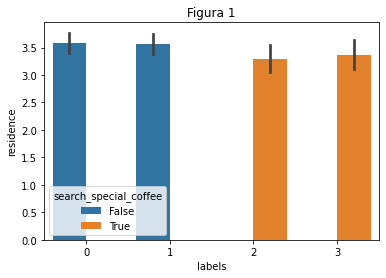

In [29]:
# Visualizando a se procura café especial por região e labels
ax = sns.barplot(x="labels", y="residence", hue="search_special_coffee", data=consumer_df).set_title('Figura 1')

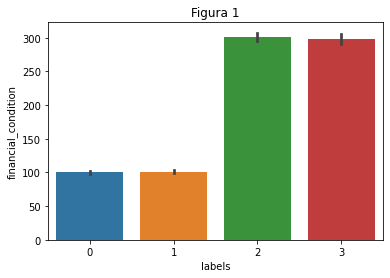

In [30]:
# Visualizando a condição financeira por labels
ax = sns.barplot(x="labels", y="financial_condition", data=consumer_df).set_title('Figura 2')

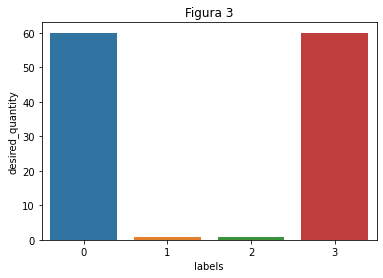

In [32]:
# Visualizando a quantidade requerida por labels
ax = sns.barplot(x="labels", y="desired_quantity", data=consumer_df).set_title('Figura 3')

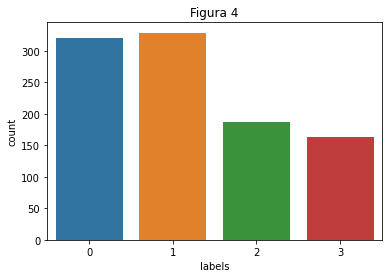

In [33]:
# Visualizando a quantidade de labels
labels = consumer_df['labels'].value_counts()
labels_df = pd.DataFrame(data=np.array([labels.index.values, labels.values]), index=["labels", "count"]).T
ax = sns.barplot(x="labels", y="count", data=labels_df).set_title('Figura 4')

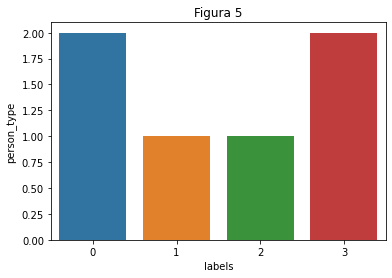

In [34]:
# Visualizando a tipo de pessoa por labels
ax = sns.barplot(x="labels", y="person_type", data=consumer_df).set_title('Figura 5')

### Conclusão

Analisando as figuras podemos observar que:
- Figura 1: Em relação à procura de café especial:
    - Label 0: Procura apenas cafés normais;
    - Label 1: Procura apenas cafés normais;
    - Label 2: Procura apenas cafés especiais;
    - Label 3: Procura apenas cafés especiais.
- Figura 2: Condição financeira do consumidor:
    - Label 0: Estão dispostos a gastar menos;
    - Label 1: Estão dispostos a gastar menos;
    - Label 2: Estão dispostos a gastar;
    - Label 3: Estão dispostos a gastar.
- Figura 3: Se produtor procura (0.5kg, 1kg ou 60kg):
    - Label 0: Procura uma safra;
    - Label 1: Não procura uma safra;
    - Label 2: Não procura uma safra;
    - Label 3: Procura uma safra;
- Figura 4: Quantidade de labels:
    - Label 0: Possui uma boa quantidade de consumidores;
    - Label 1: Possui a maior quantidade de consumidores;
    - Label 2: Possui uma quantidade média de consumidores;
    - Label 3: Possui uma pequena quantidade de consumidores;
- Figura 5: Tipo de pessoa por labels:
    - Label 0: Possui apenas consumidores do tipo pessoa jurídica;
    - Label 1: Possui apenas consumidores do tipo pessoa física;
    - Label 2: Possui apenas consumidores do tipo pessoa física;
    - Label 3: Possui apenas consumidores do tipo pessoa jurídica;

Com as observações das figuras podemos dizer que:
- Label 0: É uma das classes mais comuns, os consumidores dessa classe buscam cafés normais e não estão dispostos a gastar muito, porém procuram uma safra e com isso supomos que sejam estabelecimentos em busca de cafés para venda;
- Label 1: São os consumidores mais comuns, eles buscam cafés normais e não estão dispostos a gastar muito como também buscam em pequenas quantidades é de se imaginar então que são apenas pessoas comuns em busca de um cafezinho;
- Label 2: Consumidores dessa classe buscam cafés especiais e estão dispostas a gastar mais por isso, como também buscam em pequenas quantidades é de se imaginar então que são apenas pessoas comuns em busca de um café mais bem avaliado;
- Label 3: Consumidores dessa classe são poucos, eles buscam cafés especiais e estão dispostas a gastar mais por isso, porém procuram uma safra e com isso supomos que sejam estabelecimentos especializados em trabalhar com cafés especiais por esse motivo são poucos;

Com os resultados encontrados foram definidos os seguintes significados para os labels:
- Label 0: 
    - Título: Estabelecimento comum;
    - Descrição: São normalmente estabelecimentos em busca de uma grande quantidade de cafés comuns.
- Label 1:
    - Título: Consumidor comum; 
    - Descrição: São normalmente pessoas em busca de uma pequena quantidade de cafés comuns.
- Label 2: 
    - Título: Consumidor especial;
    - Descrição: São normalmente pessoas em busca de uma pequena quantidade de cafés especiais.
- Label 3: 
    - Título: Estabelecimento especial;
    - Descrição: São raros, mas são normalmente estabelecimentos em busca de uma grande quantidade de cafés especiais para comercialização.

In [36]:
# Criando tabela para os labels do Consumidor
tittle = ["Estabelecimento comum", "Consumidor comum", "Consumidor especial", "Estabelecimento especial"]
description = ["São normalmente estabelecimentos em busca de uma grande quantidade de cafés comuns", "São normalmente pessoas em busca de uma pequena quantidade de cafés comuns", "São normalmente pessoas em busca de uma pequena quantidade de cafés especiais", "São raros mas são normalmente estabelecimentos em busca de uma grande quantidade de cafés especias para comercialização."]
label_id=[0,1,2,3]

data = np.array([label_id, tittle, description])
index=["id", "title", "description"]
consumer_labels_df = pd.DataFrame(data=data, index=index).T
consumer_labels_df

,id,title,description
0,0,Estabelecimento comum,São normalmente estabelecimentos em busca de u...
1,1,Consumidor comum,São normalmente pessoas em busca de uma pequen...
2,2,Consumidor especial,São normalmente pessoas em busca de uma pequen...
3,3,Estabelecimento especial,São raros mas são normalmente estabelecimentos...


<br>

---
<h3> Modelagem do Produtor </h3>

#### Normalizando os dados
Uma boa prática é normalizar os dados para que o processo de modelagem seja mais preciso

In [22]:
# Declarando scaler para normalizar dataframes
scaler = StandardScaler()

# Removendo coluna ID pois ela não é importante para o processo
aux_df = producer_df
aux_df.drop(columns=['id'])

# Normalizando o dataframes
normalized_producer_df = scaler.fit_transform(aux_df)

#### Implementando PCA
Pela quantidade de variáveis ser alta o PCA será implementado para melhor visualizar os dados

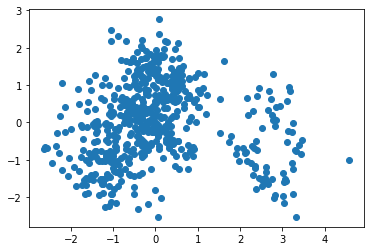

In [23]:
# Declarando PCA com 2 dimenções
pca = PCA(n_components=2)

# Pegando os dados após o fit_transform do PCA
pca_producer_df = pca.fit_transform(normalized_producer_df)

# Visualizando dados ajustados do consumidor
plt.scatter(pca_producer_df[:, 0], pca_producer_df[:, 1])
plt.show()

#### Implementando o método do cotovelo para visualizar o melhor valor de K
Vamos agora implementar o “método do cotovelo” para determinar o número de clusters. Isso pode ser feito usando WCSS (soma dos quadrados das distâncias dos pontos de dados)

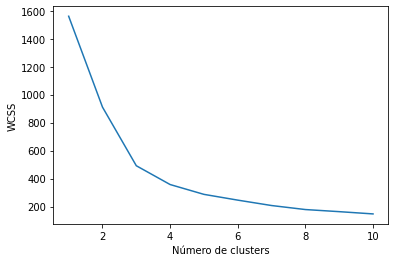

In [24]:
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters = i, init = "k-means++")
    model.fit(pca_producer_df)
    wcss.append(model.inertia_)
plt.plot(range(1,11), wcss)
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

Como é evidente que não existe um cotovelo específico para este conjunto de dados, neste projeto farei isso usando 4 clusters.

In [25]:
k = 4

#### Alimentando modelo

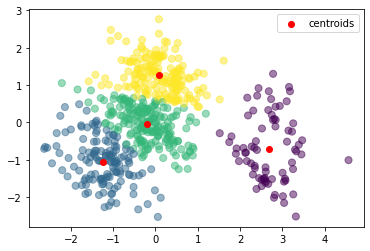

In [26]:
# Declarando modelo com 3 clusters
model = KMeans(n_clusters = k, init = "k-means++")

# Ajustando modelo com base nos dados fornecidos pelo PCA
model_v1 = model.fit(pca_producer_df)

# Pegando centroids
centers = model_v1.cluster_centers_

# Visualizando dados modelados e agrupados
plt.scatter(pca_producer_df[:, 0], pca_producer_df[:, 1], c= model_v1.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], marker="o", color='r', label='centroids')
plt.legend(scatterpoints=1)
plt.show()

#### Pegando o resultado da modelagem

In [27]:
# Realizando o predict para encontrar os labels
labels = model_v1.predict(pca_producer_df)

# Criando nova coluna com os Labels
producer_df['labels'] = labels

# Visualizando dataframe com nova coluna
producer_df.head(10)

,id,quantity_produced,residence,produces_special_coffee,coffee_score,labels
3,43887844,1023,6,False,82,3
5,85859792,1040,2,False,76,2
6,8594564,631,6,False,72,3
8,20146954,546,6,False,78,3
9,9417735,788,2,False,88,2
10,52647898,1232,2,False,79,2
14,71747727,624,2,True,81,0
20,50035192,975,2,True,81,0
21,37079803,348,2,True,83,0
22,18254964,1315,2,False,84,3


In [29]:

aux = producer_df.iloc[:, :].drop(columns=['id'])

aux_norm = scaler.fit_transform(aux)

aux_pca_norm = pca.fit_transform(aux_norm)

label_predict = model_v1.predict(aux_pca_norm)

label_predict

label_predict
aux['labels'] = label_predict

X_train, X_test, y_train, y_test = train_test_split(aux.drop(columns=['labels']), aux['labels'], random_state=42, test_size=0.3)

forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
importances

array([0.28351265, 0.22677584, 0.15739896, 0.33231254])

#### Simulando novos produtores e classificando-os utilizando o modelo atual

In [30]:
# Pegando alguns dados da tabela para simular novos produtores
new_producer_df = producer_df.iloc[10:15, :].drop(columns=['id', 'labels'])

# Normalizando
new_producer_df_norm = scaler.fit_transform(new_producer_df)

# PCA
new_producer_df_pca_norm = pca.fit_transform(new_producer_df_norm)

# Predict dos novos produtores
label_predict = model_v1.predict(new_producer_df_pca_norm)

# Adicionando resultados em uma nova coluna
new_producer_df['labels'] = label_predict

# Mostrando os resultados
new_producer_df

,quantity_produced,residence,produces_special_coffee,coffee_score,labels
24,484,6,False,82,0
25,994,1,False,67,1
29,667,3,False,68,2
31,907,5,False,80,2
32,979,3,False,39,3


Podemos observar que para realizar o predict de um novo dado uma serie de tratativas são feitas para que esses dados sejam entendíveis pelo modelo.

Com isso em mente, e possuindo agora as variáveis de saída (coluna labels) vamos utilizar um classificador supervisionado para realizar a classificação de novos dados.

#### Treinando o classificador

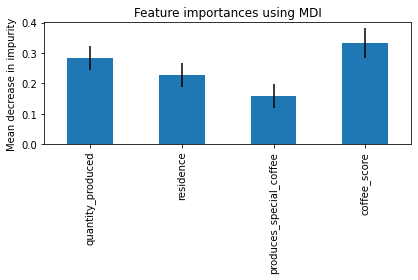

In [31]:
# Separando dados para teste e para o predict
X_train, X_test, y_train, y_test = train_test_split(aux.drop(columns=['labels']), aux['labels'], random_state=42, test_size=0.3)

# Declarando o ramdom forest
forest = RandomForestClassifier(random_state=0)

# Trainando o modelo
forest.fit(X_train, y_train)

# Criando um serie par visualizar melhor as features importantes
forest_importances = pd.Series(importances, index=X_train.columns)

# Pegando o desvio padrão
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

# Visualizando as variavies mais importantes para o classificador
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### Avaliando o novo classificador

In [39]:
from sklearn.metrics import accuracy_score

new_producer_df = producer_df.iloc[10:20, :]

y_true = new_producer_df['labels']
x_real = new_producer_df.drop(columns=['labels', 'id'])

y_pred = forest.predict(x_real)

# Avaliando o classificador
accuracy_score(y_true, y_pred)

0.8

Resultado: Podemos observar que o classificador por possuir um score geral aceitável para o projeto atual. Com isso, vamos utilizar o classificador supervisionado para realizar as novas classificações

### Análise exploratória
Para isso, será utilizado a biblioteca seaborn para melhor visualizar os dados

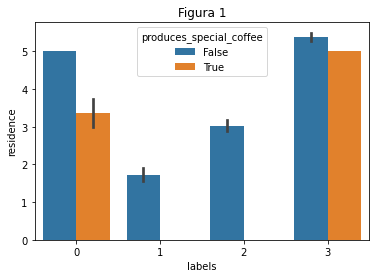

In [48]:
# Visualizando a produção de café especial por região e labels
ax = sns.barplot(x="labels", y="residence", hue="produces_special_coffee", data=producer_df).set_title('Figura 1')

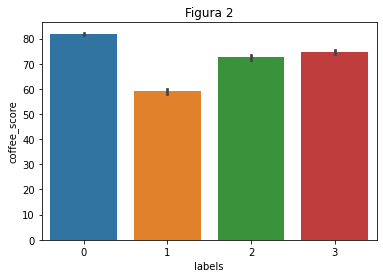

In [49]:
# Visualizando a pontuação do café especial por labels
ax = sns.barplot(x="labels", y="coffee_score", data=producer_df).set_title('Figura 2')

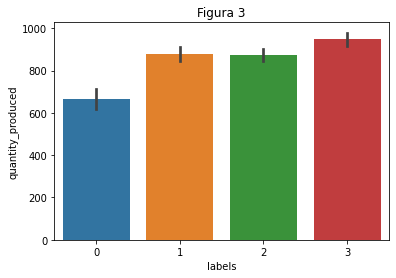

In [50]:
# Visualizando a produção de café por labels
ax = sns.barplot(x="labels", y="quantity_produced", data=producer_df).set_title('Figura 3')

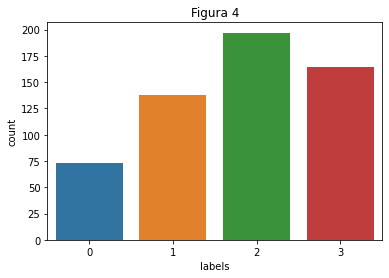

In [72]:
# Visualizando a quantidade de labels
labels = producer_df['labels'].value_counts()
labels_df = pd.DataFrame(data=np.array([labels.index.values, labels.values]), index=["labels", "count"]).T
ax = sns.barplot(x="labels", y="count", data=labels_df).set_title('Figura 4')

### Conclusão

Analisando as figuras podemos observar que:
- Figura 1: Em relação a produção de café especial:
    - Label 0: Produz ambos os tipos de café (especial e comum);
    - Label 1: Apenas cafés normais;
    - Label 2: Apenas cafés normais;
    - Label 3: Produz ambos os tipos de café (especial e comum).
- Figura 2: Qualidade do café que é avaliada pela pontuação do produto:
    - Label 0: Produz a melhor avaliação do café;
    - Label 1: Possui a menor nota de seus concorrentes;
    - Label 2: Possui uma boa avaliação;
    - Label 3: Possui uma boa avaliação.  
- Figura 3: Produção de café:
    - Label 0: Produz em pouca quantidade;
    - Label 1: Produz em boa quantidade;
    - Label 2: Produz em boa quantidade;
    - Label 3: Produz a maior quantidade de café.
- Figura 4: Número de produtores por cada label:
    - Label 0: Possui a menor quantidade de produtores;
    - Label 1: Possui uma boa quantidade de produtores;
    - Label 2: Possui a maior quantidade de produtores;
    - Label 3: Possui uma boa quantidade de produtores;

Com as observações das figuras podemos dizer que:
- Label 0: Produz o melhor café em poucas quantidades incluindo café especial. Isso nos faz pensar que é um grupo de produtores que tem como foco o café especial possuindo assim uma nota em média 80;
- Label 1: Produz o café comum com a menor pontuação com uma boa quantidade. Isso nos faz pensar que é um grupo de produtores pequenos que tem como foco o café comum e por consequência o café mais barato em relação aos concorrentes;
- Label 2: Produtores intermediários, possuem uma boa nota e são os que possuem em número a maior quantidade de produtores envolvidos se tornando assim a produção mais comum;
- Label 3: São os que mais produzem café incluindo café especial porém a avaliação do café é um pouco inferior ao label 0 (também produz café especial). Concui-se que este grupo de produtores não possuem um foco especifico produzindo um pouco de tudo em boa qualidade.

Com os resultados encontrados foram definidos os seguintes significados para os labels:
- Label 0: 
    - Título: Superman;
    - Descrição: Titulo dado a produtores com um alto index de qualidade de café. Dizem que o café feito por esses produtores é tão especial que parece ser de outro planeta;
    - Produção: Baixa;
    - Qualidade: Alta;
    - Especial: True;
    - Raridade: Alta.
- Label 1:
    - Título: Arqueiro Verde; 
    - Descrição: : Por mais que não possua poderes que o fazem especial e mesmo não sendo o preferido de muitos 'críticos' ele faz o que é possível para ajudar o cidadão comum;;
    - Produção: Média;
    - Qualidade: Baixa;
    - Especial: False;
    - Raridade: Média;
- Label 2: 
    - Título: Batman;
    - Descrição: Assim como o café dessa classe, o Batman não possui poderes que o fazem ser especial, porém o carinho do público por ele deixou-o no topo dos mais populares;
    - Produção: Média;
    - Qualidade: Média;
    - Especial: False;
    - Raridade: Baixa;
- Label 3: 
    - Título: Mulher maravilha;
    - Descrição: Devido a sua ascendência, Diana possui poderes digno de deuses gregos e mesmo em muitas histórias não sendo poderosa o suficiente como o Superman, ela não faz feio. Sendo também uma das mais queridas;
    - Produção: Alta;
    - Qualidade: Média;
    - Especial: True;
    - Raridade: Média;

In [75]:
# Criando tabela para os labels do Produtor
tittle = ["Superman", "Arqueiro Verde", "Batman", "Mulher maravilha"]
description = ["Titulo dado a produtores com um alto index de qualidade de café. Dizem que o café feito por esses produtores é tão especial que parece ser de outro planeta", "Por mais que não possua poderes que o fazem especial e mesmo não sendo o preferido de muitos 'críticos' ele faz o que é possivel para ajudar o cidadão comum", "Assim como o café dessa classe, o Batman não possue poderes que o fazem ser especial, porém o carinho do público por ele deixou-o no topo dos mais populares", "Devido a sua ascendência, Diana possui poderes digno de deuses gregos e mesmo em muitas histórias não sendo poderosa o sufiente como o Superman, ela não faz feio. Sendo tabém uma das mais queridas"]
produces_special_coffee = [True, False, False, True]
quality = ['Alta', 'Baixa', 'Média', 'Média']
rarity = ['Alta', 'Média', 'Baixa', 'Média']
production = ['Baixa', 'Média', 'Média', 'Alta']
label_id=[0,1,2,3]

data = np.array([label_id, tittle, description, produces_special_coffee, quality, rarity, production])
index=["id", "title", "description", "produces_special_coffee","quality", "rarity", "production"]
producer_labels_df = pd.DataFrame(data=data, index=index).T
producer_labels_df

,id,title,description,produces_special_coffee,quality,rarity,production
0,0,Superman,Titulo dado a produtores com um alto index de ...,True,Alta,Alta,Baixa
1,1,Arqueiro Verde,Por mais que não possua poderes que o fazem es...,False,Baixa,Média,Média
2,2,Batman,"Assim como o café dessa classe, o Batman não p...",False,Média,Baixa,Média
3,3,Mulher maravilha,"Devido a sua ascendência, Diana possui poderes...",True,Média,Média,Alta


---
### Conclusão da modelagem

Podemos observar então que a modelagem nos vai permitir agrupar consumidores com produtores que tenham capacidade de atender suas expectativas.

Como exemplo disso, podemos dizer que um <b>estabelecimento especial</b> ao realizar a busca na plataforma o resultado mais frequente para esse consumidor seria os produtores com o título de <b>Mulher Maravilha</b>.